### Research Questions
1. Which region has the highest score of Happiness?
2. Does the economy effects happiness score significantly?
3. What factor influence the happiness score the most? 

### Prepare the Data
The preparation comprises following:
- import the libraries
- load and view the dataset 
- check the columns' description 
- check the number of columns/rows 
- check the missing values
- check the countries with highest and lowest happiness score
- check the descriptive statistics of the data

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

#load and view the dataset
df = pd.read_csv('World_Happiness_Report_2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
#check the columns' description
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [3]:
#check the number of columns/rows
num_rows = df.shape[0]
num_cols = df.shape[1]

print(num_rows)
print(num_cols)

158
12


In [4]:
#check the missing values
vals_miss_cols = set(df.columns[df.isnull().mean() != 0])

vals_miss_cols

set()

In [5]:
#check the countries with highest and lowest happiness score
df.groupby(['Country']).mean()['Happiness Score'].sort_values(ascending = False)

Country
Switzerland    7.587
Iceland        7.561
Denmark        7.527
Norway         7.522
Canada         7.427
               ...  
Rwanda         3.465
Benin          3.340
Syria          3.006
Burundi        2.905
Togo           2.839
Name: Happiness Score, Length: 158, dtype: float64

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Question 1
1. Which region has the higher score of happiness?
    * *To answer this question, the data is grouped by the region with regard to the happiness score.*

In [12]:
region_happiness = df.groupby(['Region']).mean()['Happiness Score']
region_happiness

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

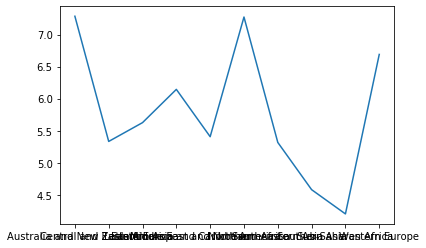

In [17]:
plt.plot(region_happiness)
plt.show()

**Analysis result**: *Australia and New Zealand region have the highest happiness score*

### Question 2
2. Does the economy effects happiness score significantly?
    - This question can be formulated as follow: do countries with the high extend of economy influence toward the happiness have high happiness score?
    - To answer this question, the data is grouped based on the Happiness Rank and sort based on the Economy (GDP per Capita)

In [8]:
rank_vs_economy = df.groupby(['Happiness Rank']).mean()['Economy (GDP per Capita)'].sort_values(ascending = False)

rank_vs_economy

Happiness Rank
28     1.69042
17     1.56391
39     1.55422
24     1.52186
4      1.45900
        ...   
116    0.07120
144    0.06940
131    0.01604
157    0.01530
120    0.00000
Name: Economy (GDP per Capita), Length: 157, dtype: float64

**Analysis result**: countries with the high extend of economy influence to the happiness score  do not necessarily have the highest happiness score/rank; however, countries with the low extend of economy influence to the happiness score do have the lowest happiness score/rank

### Question 3
What factor influence the Happiness Score the most? 

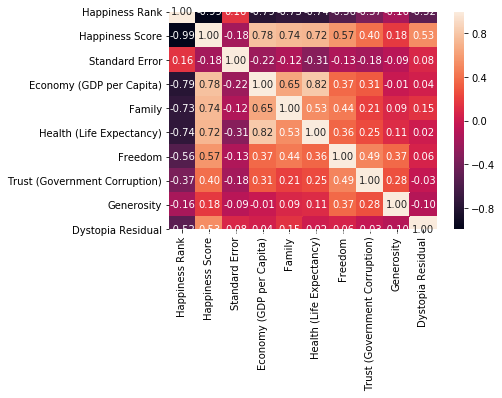

In [9]:
sns.heatmap(df.corr(), annot=True, fmt='.2f');

**Analyis result**: based on the heatmap correlation diagram above, the happiness score correlates strongly with the *Economy (GDP per Capita)*, *Family*, and *Health (Life Expectancy)*.